In [24]:
import numpy as np
from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm
import matplotlib.pyplot as plt
from itertools import combinations
%matplotlib inline

import seaborn as sns

In [10]:
def get_distances(pts):
    pt_pairs = combinations(pts, 2)
    distances = np.array([norm(x-y,2) for x,y in pt_pairs])
    return distances

In [11]:
def get_angles(pts):
    pt_pairs = combinations(pts, 2)
    angles = np.array([
        arccos(clip(dot(x,y)/norm(x)/norm(y), -1, 1)) for x,y in pt_pairs
    ])
    return angles

In [13]:
def sample_unif_cubes(n=30, d=100):
    return np.random.uniform(-0.5, 0.5, size=(n,d))

In [14]:
def sample_unif_balls(n=30, d=100):
    balls = np.random.normal(0,1,size=(n,d))
    
    for i in range(n):
        balls[i,:] *= np.random.power(d) / norm(balls[i,:])
    
    return balls

In [15]:
cubes = sample_unif_cubes()

In [19]:
balls = sample_unif_balls()

In [21]:
ball_distances = get_distances(balls)
cube_distances = get_distances(cubes)

In [22]:
ball_angles = get_angles(balls)
cube_angles = get_angles(cubes)

<Figure size 432x288 with 0 Axes>

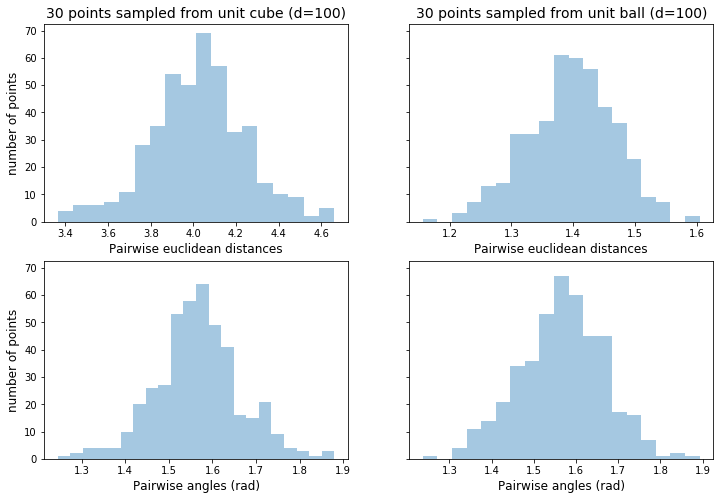

In [87]:
plt.figure()
fig,axes = plt.subplots(2,2,sharex=False, sharey=True, figsize=(12,8))

kde = False

axes[0,0].set_title('30 points sampled from unit cube (d=100)', fontsize=14)
axes[0,0].set_ylabel('number of points', fontsize=12)
sns.distplot(cube_distances, kde=kde, ax=axes[0,0])
axes[0,0].set_xlabel('Pairwise euclidean distances', fontsize=12)

axes[0,1].set_title('30 points sampled from unit ball (d=100)', fontsize=14)
sns.distplot(ball_distances, kde=kde, ax=axes[0,1])
axes[0,1].set_xlabel('Pairwise euclidean distances', fontsize=12)

axes[1,0].set_ylabel('number of points', fontsize=12)
sns.distplot(cube_angles, kde=kde, ax=axes[1,0])
axes[1,0].set_xlabel('Pairwise angles (rad)', fontsize=12)

sns.distplot(ball_angles, kde=kde, ax=axes[1,1])
axes[1,1].set_xlabel('Pairwise angles (rad)', fontsize=12)

plt.savefig('./HW1-Sampled_Points.png')
plt.show()

## Remarks
The distributions of pairwise angles between the two sampling distributions appears to be quite similar. Indeed the angles in both cases center at approximately $\pi/2$, which is expected as most vectors from the origin to the points are orthogonal to each other.

The euclidean distances appear different than one another. Both distributions appear fairly normal but that of the unit cube has a mean much greater than that of the unit ball. This makes sense as the unit ball has much less volume and so the points will be clustered more closely together.